In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle

import sympy as sy
from IPython.display import display
import h5py
import os
import sys
sy.init_printing()

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


%matplotlib nbagg

In [3]:
# Settings pour les figures matplotlib
mpl.rcParams['figure.dpi'] = 72

#%matplotlib nbagg

FIGSIZE  = (10,5)
FONTSIZE = 30
TICK_FONTSIZE = 24
LEGEND_FONTSIZE = 22

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
plt.rc('text', usetex=True)
LATEX_FIG_PATH = "../01_FIGS/"
FIGS_PATH      = "02_figs/"
PPTY_XVBAR = {'c':  'r', 
              'linestyle':'-.', 
              'linewidth':0.75,
             }
PPTY_LEG = { 'fontsize' : 16,
             'loc'      : 'upper left',
           }

In [24]:
original_FN = "simu.05_05.15_10_original_N=6.h5"
new_FN = "simu.05_14.11_45_new_N=6.h5"

original_fid = h5py.File(original_FN, 'r')
original_fid.flush()

o_metadata = original_fid["metadata"]
o_data     = original_fid["data_simu"]
o_model    = original_fid["model"]

new_fid = h5py.File(new_FN, 'r')
new_fid.flush()

n_metadata = new_fid["metadata"]
n_data     = new_fid["data_simu"]
n_model    = new_fid["model"]

In [6]:
t = o_data["t"][:]
tmax = max(t)

indt = (t <= tmax) * (t >= 0.)

In [8]:
# On récupère les VT_subs
o_params_label = list(o_model["VT_subs"].keys())
o_ell_1 = o_model["VT_subs"]["ell_1"][()]

for o_label in o_params_label:
    o_value = o_model["VT_subs"][o_label][()]
    exec("%s = %f" % (o_label, o_value))
    print("%s = %f" % (o_label, o_value))

L_1 = 0.020000
L_2 = 0.020000
L_3 = 0.020000
L_4 = 0.020000
L_5 = 0.020000
L_6 = 0.020000
P_0 = 101325.000000
V_0_1 = 0.000012
V_0_2 = 0.000012
V_0_3 = 0.000012
V_0_4 = 0.000012
V_0_5 = 0.000012
V_0_6 = 0.000012
Z_ray = 2222.222222
ell_1 = 0.014583
ell_2 = 0.014583
ell_3 = 0.014583
ell_4 = 0.014583
ell_5 = 0.014583
ell_6 = 0.014583
gamma = 1.400000
rho_0 = 1.225000


In [9]:
# On récupère les VT_subs
n_params_label = list(n_model["VT_subs"].keys())
n_ell_1 = n_model["VT_subs"]["ell_1"][()]

for n_label in n_params_label:
    n_value = n_model["VT_subs"][n_label][()]
    exec("%s = %f" % (n_label, n_value))
    print("%s = %f" % (n_label, n_value))

L_1 = 0.020000
L_2 = 0.020000
L_3 = 0.020000
L_4 = 0.020000
L_5 = 0.020000
L_6 = 0.020000
P_0 = 101325.000000
V_0_1 = 0.000012
V_0_2 = 0.000012
V_0_3 = 0.000012
V_0_4 = 0.000012
V_0_5 = 0.000012
V_0_6 = 0.000012
Z_ray = 2222.222222
ell_1 = 0.014583
ell_2 = 0.014583
ell_3 = 0.014583
ell_4 = 0.014583
ell_5 = 0.014583
ell_6 = 0.014583
gamma = 1.400000
rho_0 = 1.225000


### Débit à gauche 

<IPython.core.display.Javascript object>


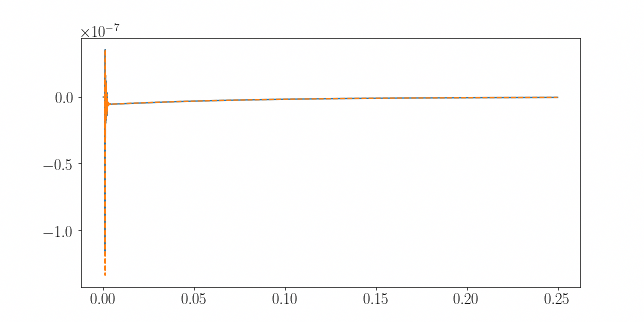

In [29]:
ind = 0
fig = plt.figure(figsize=FIGSIZE)
ax = plt.gca()
ax.plot(t[indt], o_data["y"][indt,ind])
ax.plot(t[indt], n_data["y"][indt,ind],'--')

### Variable d'état

rho_2


<IPython.core.display.Javascript object>


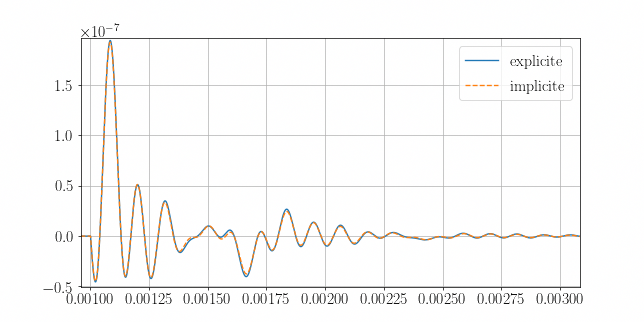

In [45]:
ind = 20
print(o_model["x_label"][ind])

fig = plt.figure(figsize=FIGSIZE)
ax = plt.gca()
ax.plot(t[indt], o_data["x"][indt,ind],label='explicite')
ax.plot(t[indt], n_data["x"][indt,ind],'--', label='implicite')

ax.legend(frameon=True, loc="upper right")
ax.grid()
plt.show()